<a href="https://colab.research.google.com/github/charlesrugg/code_examples/blob/main/Stops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

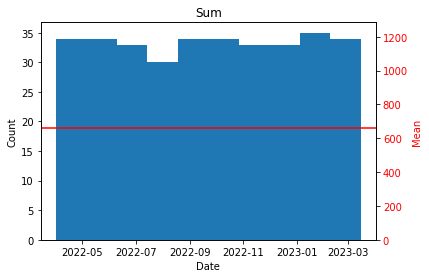

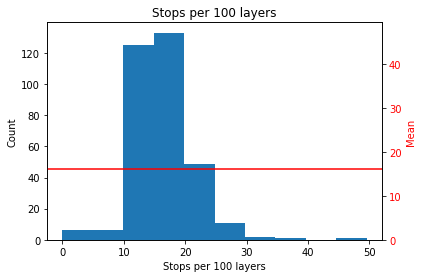

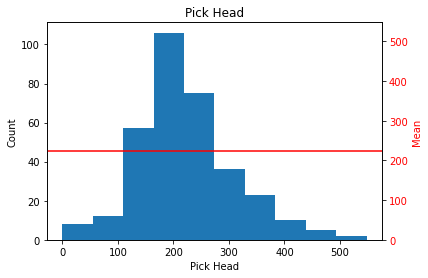

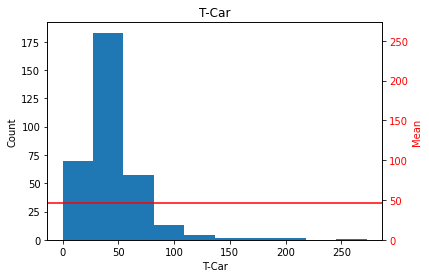

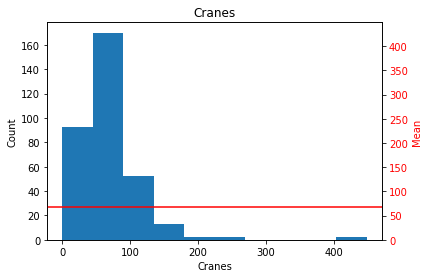

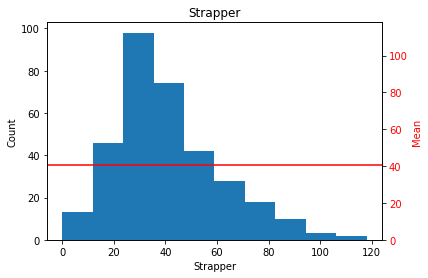

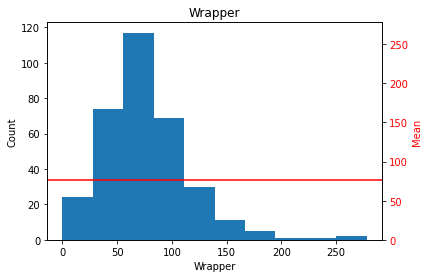

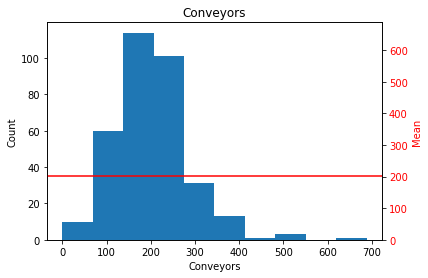

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a pandas DataFrame
df = pd.read_csv("stops (1).csv", parse_dates=['Date'], index_col='Date')

# Create a histogram for each column
for col in df.columns:
    # Calculate the mean of the column
    avg = df[col].mean()
    
    # Create the histogram
    fig, ax1 = plt.subplots()
    if col == df.columns[0]: # Check if the column is a date column
        ax1.hist(df.index, bins='auto')
        ax1.set_xlabel("Date")
    else:
        ax1.hist(df[col])
        ax1.set_xlabel(col)
    ax1.set_ylabel("Count")
    
    # Add a second y-axis for the mean
    ax2 = ax1.twinx()
    ax2.axhline(y=avg, color='r', linestyle='-')
    ax2.set_ylabel("Mean", color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim([0, df[col].max()])
    
    # Display the plot
    plt.title(col)
    plt.show()

In [ ]:
df.describe

<bound method NDFrame.describe of                Sum  Stops per 100 layers  Pick Head  T-Car  Cranes  Strapper  \
Date                                                                           
2022-04-01   744.0                  18.4      271.0   37.0    97.0      41.0   
2022-04-02   664.0                  21.6      245.0   42.0    92.0      37.0   
2022-04-03   811.0                  21.3      315.0   39.0    98.0      43.0   
2022-04-04   907.0                  20.5      352.0   49.0    77.0      72.0   
2022-04-05  1170.0                  22.2      473.0   67.0    94.0      45.0   
...            ...                   ...        ...    ...     ...       ...   
2023-03-12   721.0                  13.8      237.0   52.0    48.0      27.0   
2023-03-13   817.0                  15.8      279.0   59.0    58.0      24.0   
2023-03-14   683.0                  19.1      196.0   26.0    62.0      21.0   
2023-03-15   606.0                  11.0      184.0   27.0    66.0      18.0   
NaT   

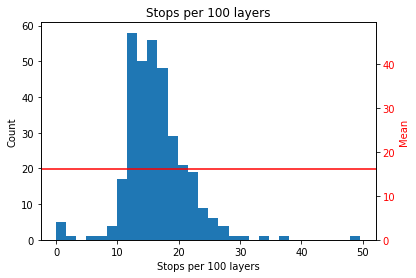

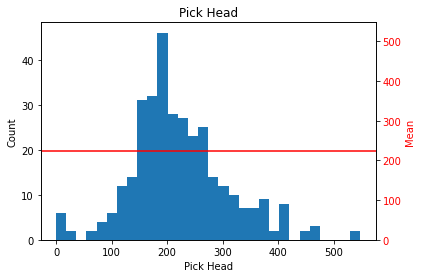

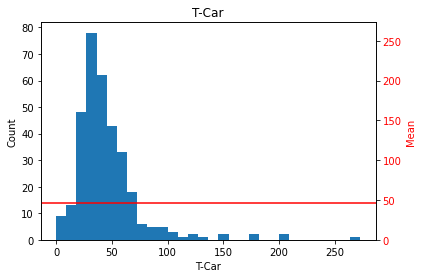

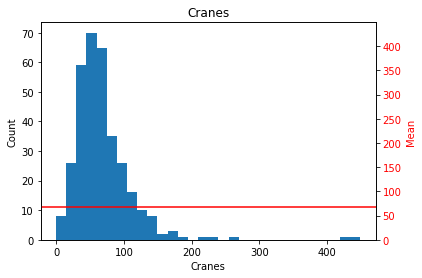

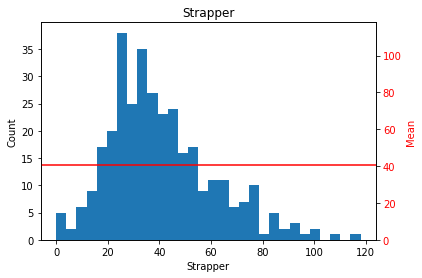

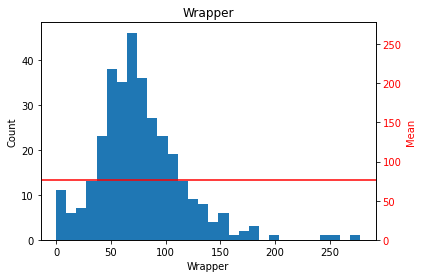

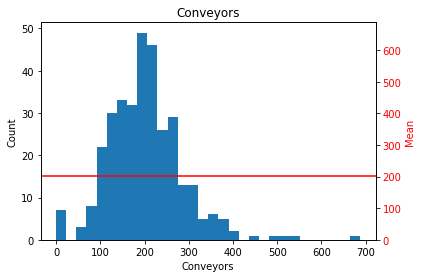

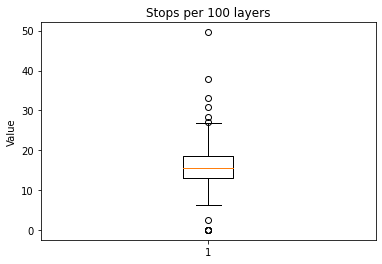

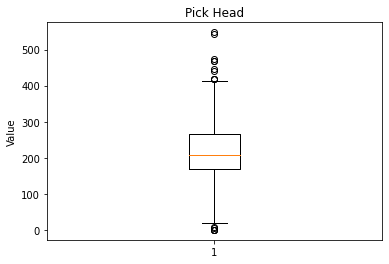

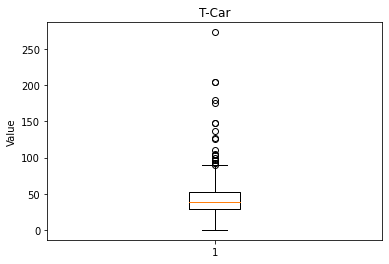

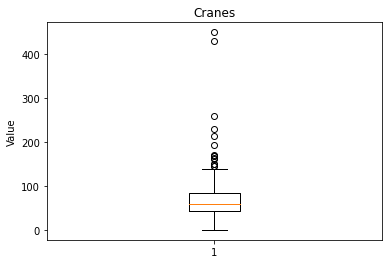

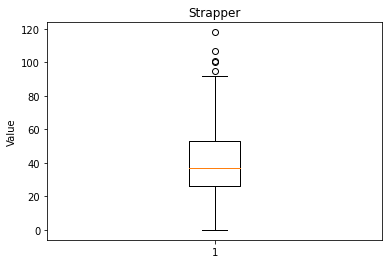

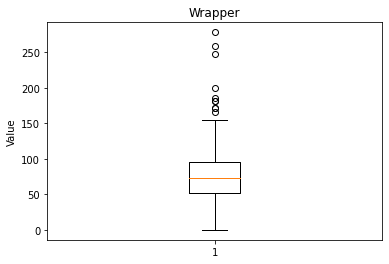

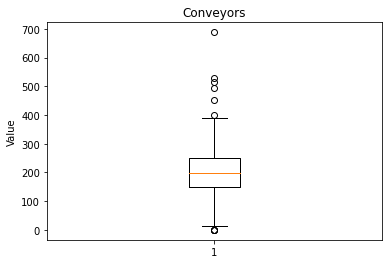

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a pandas DataFrame
df = pd.read_csv("stops (1).csv", parse_dates=[0], index_col=0)

# Create a histogram for each column
for col in df.columns[1:]:
    # Calculate the mean of the column
    avg = df[col].mean()

    # Resample the data to daily frequency and create a histogram
    daily_data = df[col].resample('D').mean()
    fig, ax1 = plt.subplots()
    ax1.hist(daily_data, bins=30)
    ax1.set_xlabel(col)
    ax1.set_ylabel("Count")

    # Add a second y-axis for the mean
    ax2 = ax1.twinx()
    ax2.axhline(y=avg, color='r', linestyle='-')
    ax2.set_ylabel("Mean", color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim([0, daily_data.max()])

    # Display the plot
    plt.title(col)
    plt.show()

# Create box and whisker plots for each non-date column
non_date_cols = [col for col in df.columns[1:] if not pd.api.types.is_datetime64_any_dtype(df[col])]
for col in non_date_cols:
    fig, ax = plt.subplots()
    ax.boxplot(df[col].dropna())
    ax.set_title(col)
    ax.set_ylabel("Value")
    plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load the data into a pandas DataFrame
df = pd.read_csv("stops (1).csv", parse_dates=[0], index_col=0)

# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Add a new column with the day of the week (0=Monday, 1=Tuesday, etc.)
df['DayOfWeek'] = df['Date'].dt.dayofweek
#def drop_nan_rows(df):
    # Drop rows with any NaN values
 #   df_filtered = df.dropna()

 #   return df_filtered

# Drop NaN rows
#df = drop_nan_rows(df)

# Histograms
df.hist(figsize=(10,8))
plt.suptitle('Histograms')
plt.show()

# Box and whisker plots
df_box = df.drop(columns=['Sum'])
df_box.boxplot(figsize=(10,8))
plt.title('Box and Whisker Plots')
plt.show()

# Scatter plot
plt.scatter(df.index, df['Sum'])
plt.xlabel('Date')
plt.ylabel('Total Stops')
plt.title('Scatter Plot')
plt.show()

# Line plot
plt.plot(df.index, df['Sum'])
plt.xlabel('Date')
plt.ylabel('Total Stops')
plt.title('Line Plot')
plt.show()

# Heat map
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()

# Violin plot
df_box_melted = pd.melt(df_box)
sns.violinplot(x='variable', y='value', data=df_box_melted)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Violin Plot')
plt.xticks(rotation=45)
plt.show()



FileNotFoundError: ignored

In [ ]:
sns.histplot(x='Total Stops', hue='DayOfWeek', data=df, multiple='stack')

In [3]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Compute the rolling 14-day moving average of 'Total Stops'
df['MovingAverage'] = df['Total Stops'].rolling(window=14).mean()

# Plot the 'Total Stops' column with the 14-day moving average
sns.lineplot(x='Date', y='Total Stops', data=df)
sns.lineplot(x='Date', y='MovingAverage', data=df)
plt.xlabel('Date')
plt.ylabel('Total Stops')
plt.legend(labels=['Total Stops', 'Moving Average'])

NameError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stops.csv to stops (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stops Data - Sheet1.csv to Stops Data - Sheet1.csv


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stops Data - Sheet1.csv to Stops Data - Sheet1.csv
